<a href="https://colab.research.google.com/github/skrzypczykt/CycleGAN/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEVELOP MLP WITH ONE HIDDEN LAYER  USING ANY PROGRAMMING LANGUAGE FOR  PREDICTION OF THE FOLLOWING FUNCTION  
$$y = asin(bx) + d$$

In [1]:
a = 1
b = 5
d = 0.1
n_steps = 3

In [2]:
import math
import random
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
f = lambda x:a*math.sin(b*x) + d

In [3]:
#Gerenrating 120 time series
data = []
ys = []
for i in np.arange(start =0,stop = 12, step=0.1 ):
  data.append([f(i), f(i+0.1), f(i+0.2)])
  ys.append([f(i+0.3)])

data = np.array(data)
ys = np.array(ys)

In [4]:
#creating subsets 30, 50, 100 series and  20 test ones
X_train_100, X_test, y_train_100, y_test = train_test_split(data, ys, test_size=20)
random_50 = random.choices(range(100), k=50)
random_30 = random.choices(range(100), k=30)
X_train_50, y_train_50 = X_train_100[random_50], y_train_100[random_50]
X_train_30, y_train_30 = X_train_100[random_30], y_train_100[random_30]

Since we got a =1 and very small d=0.1 our values are in the range of -0.9 til 1.1 hence we decide not to perform the minimax scaling.

In [5]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.layers import Dense
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

In [6]:
def create_model(dense_neurons, optimizer):
  model = tf.keras.models.Sequential([Dense(dense_neurons,input_shape=(n_steps,), activation='sigmoid'), Dense(1)])
  model.compile(optimizer=optimizer, loss='mse')
  return model

Training for 10 hidden neurons and SGD optimizer with 0.01 learning rate

In [ ]:
model = create_model(10, sgd)
history = model.fit(X_train_100, y_train_100, epochs=50)

In [8]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$f(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10, label='true')
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro", label='predicted')
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.legend()
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, d-a, d +a])

Text(0.5, 1.0, 'The error  change depending on the epoch')

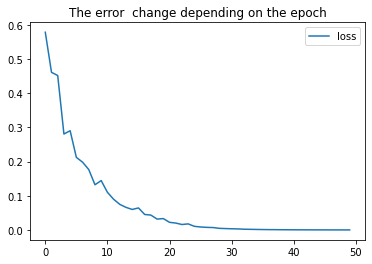

In [9]:
pd.DataFrame(history.history).plot()
plt.title("The error  change depending on the epoch")

In [10]:
y_pred_train = model.predict(X_train_100)
deviation_train = y_pred_train - y_train_100
conc = np.concatenate((y_train_100, y_pred_train, deviation_train), axis=1)
df = pd.DataFrame(conc, columns=['true','predicted','deviation'])
df

,true,predicted,deviation
0,-0.881108,-0.881124,-0.000016
1,-0.898082,-0.898015,0.000067
2,0.512118,0.514112,0.001994
3,0.223573,0.231605,0.008032
4,-0.387175,-0.381751,0.005423
...,...,...,...
95,-0.624108,-0.622454,0.001653
96,1.099912,1.078537,-0.021375
97,-0.875626,-0.876672,-0.001046
98,-0.328183,-0.321877,0.006305


In [11]:
y_pred = model.predict(X_test)

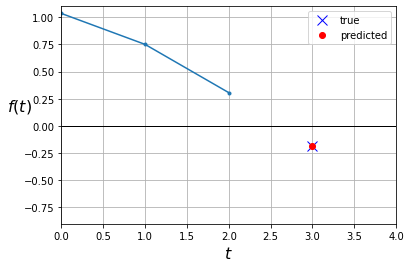

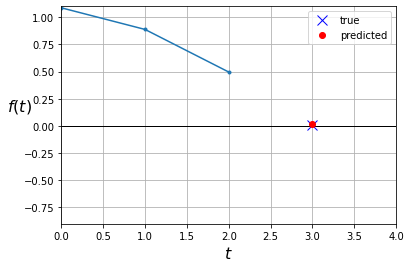

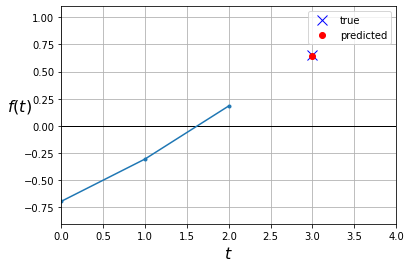

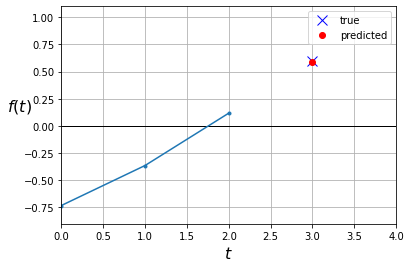

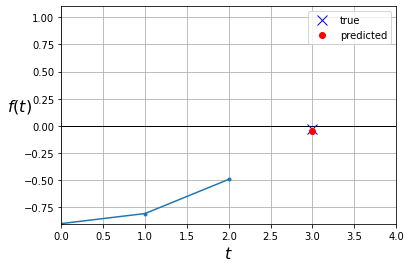

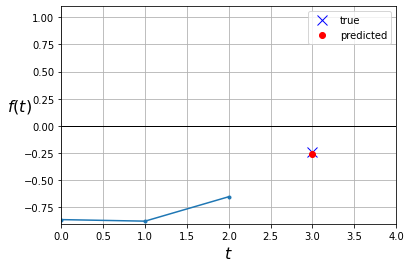

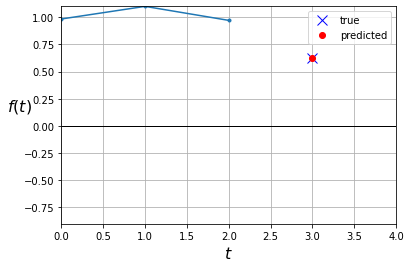

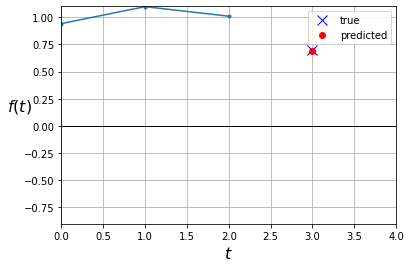

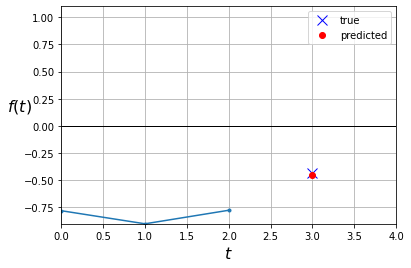

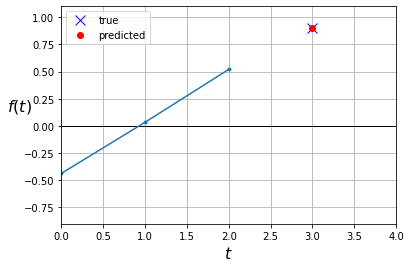

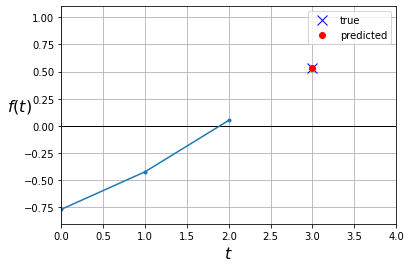

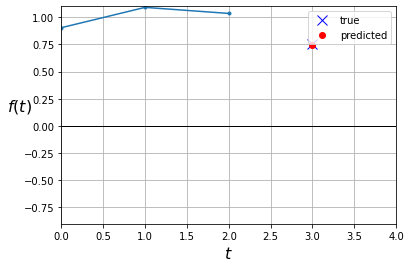

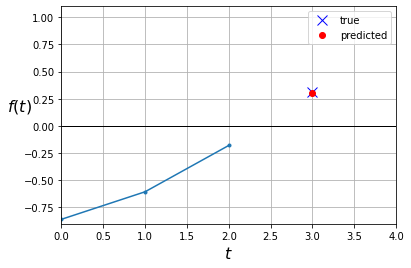

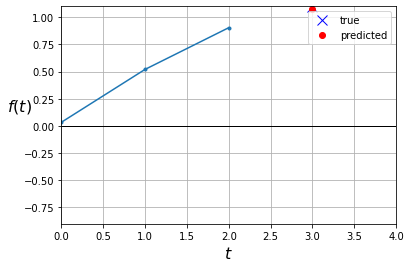

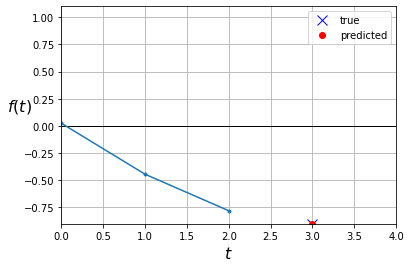

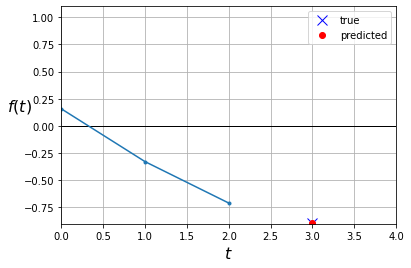

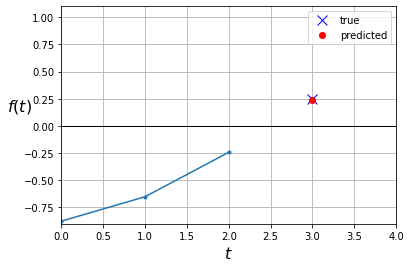

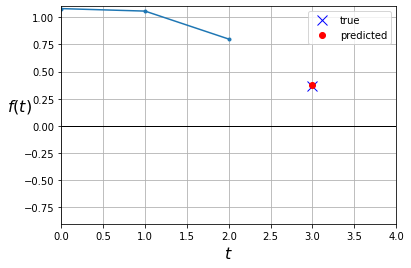

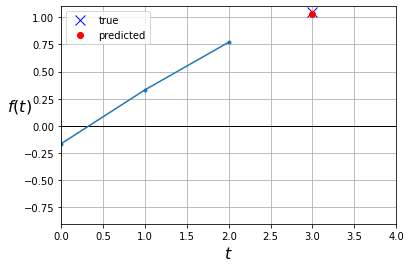

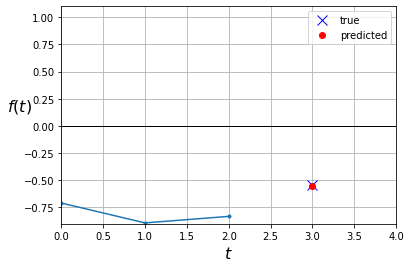

In [12]:
#plotting some results
for i in range(20):
  plot_series(X_test[i, :], y_test[i], y_pred[i])
  plt.show()

In [13]:
deviation = y_pred - y_test
conc = np.concatenate((y_test, y_pred, deviation), axis=1)
df = pd.DataFrame(conc, columns=['true','predicted','deviation'])
df

,true,predicted,deviation
0,-0.187903,-0.179877,0.008026
1,0.007209,0.016337,0.009129
2,0.651427,0.646733,-0.004693
3,0.594885,0.589845,-0.005040
4,-0.032352,-0.045454,-0.013102
5,-0.242481,-0.256414,-0.013933
6,0.629083,0.627013,-0.002070
7,0.698472,0.693556,-0.004916
8,-0.436573,-0.449224,-0.012651
9,0.903784,0.896757,-0.007027


Hidden neurons number

In [ ]:
results = {}
for hidden_neurons in [3,5,10,20,50]:

  model = create_model(hidden_neurons, sgd)
  history = model.fit(X_train_100, y_train_100, epochs=50, verbose=0)
  results[hidden_neurons] = model.evaluate(X_test,y_test)

In [15]:
#Mean Squared Error depending on the hidden neurons number
results

{3: 0.0006776355439797044,
 5: 0.004690096713602543,
 10: 0.00022423182963393629,
 20: 5.2930961828678846e-05,
 50: 0.001276765251532197}

In [ ]:
results_train_size = {}
for (X,y), num in zip([[X_train_100, y_train_100],[X_train_50, y_train_50],[X_train_30, y_train_30]], [100, 50, 30]):

  model = create_model(20, sgd)
  history = model.fit(X, y, epochs=50, verbose=0)
  results_train_size[num] = model.evaluate(X_test,y_test)

In [17]:
results_train_size

{30: 0.17518725991249084,
 50: 0.010193198919296265,
 100: 0.00010876332817133516}

The same for adaptive learning rate

In [18]:
results_train_size = {}
for (X,y), num in zip([[X_train_100, y_train_100],[X_train_50, y_train_50],[X_train_30, y_train_30]], [100, 50, 30]):

  model = create_model(20, adam)
  history = model.fit(X, y, epochs=50, verbose=0)
  results_train_size[num] = model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 58ms/step - loss: 0.0012


In [19]:
results_train_size

{30: 0.001228004926815629,
 50: 6.259379733819515e-05,
 100: 0.00012383036664687097}